# Explore

In [30]:
import os
import pandas as pd
from model import DocumentProcessor
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create database from documents(pdf to vectorstore)
# path = "temp"
# dp = DocumentProcessor()
# for filename in os.listdir(path):
#     filepath = os.path.join(path, filename)
#     dp.create_db_from_document(filepath)

In [18]:
# Create database from video
DocumentProcessor().is_vectorstores_empty()
url = ["https://www.youtube.com/watch?v=2_aq-xxBLe8", "https://www.youtube.com/watch?v=PPoqvj2By74"]
for u in url:
    dp.create_db_from_video(u)

False

In [ ]:
# Read questions from text file and convert to csv file
# df = pd.DataFrame(columns=['category', 'question'])
# text = "questions.txt"
# with open(text, "r") as f:
#     for line in f:
#         category = line.split("|")[0]
#         question = line.split("|")[1].replace("\n", "")
#         new_data = pd.DataFrame([[category, question]], columns=['category', 'question'])
#         df = pd.concat([df, new_data], ignore_index=True)

# if os.path.exists("questions.csv"):
#     os.remove("questions.csv")
# df.to_csv("questions.csv", index=False)

In [ ]:
# Compute rouge score
# dp = DocumentProcessor()
# db = dp.load_db()

# import evaluate
# # import nltk
# from nltk.tokenize import sent_tokenize
# from nltk.util import ngrams
# from nltk.tokenize import word_tokenize
# # nltk.download("punkt")

# rouge_score = evaluate.load("rouge")

# def compute_rouge(generated: str, reference: str, n_gram=1) -> dict:
#     generated_token = word_tokenize(generated)
#     reference_token = word_tokenize(reference)
    
#     generated_ngram = set(ngrams(generated_token, n_gram))
#     reference_ngram = set(ngrams(reference_token, n_gram))
    
#     common_ngram = generated_ngram.intersection(reference_ngram)
    
#     precision = len(common_ngram) / len(generated_ngram) if len(generated_ngram) > 0 else 0
#     recall = len(common_ngram) / len(reference_ngram) if len(reference_ngram) > 0 else 0
#     fscore = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
#     return precision, recall, fscore
  

# answer = []
# reference = []
# precisions1 = []
# recalls1 = []
# f1scores1 = []
# precisions2 = []
# recalls2 = []
# f1scores2 = []
# bestscore = []
# df = pd.read_csv("questions.csv")
# for i in df.index:
#     response, source = dp.get_response_from_query(db=db, query=df["question"][i])
#     response = response.replace("\n", "\\n")
#     source = source.replace("\n", "\\n")
    
#     answer.append(response)
#     reference.append(source)
#     p, r, f1 = compute_rouge(response, source, n_gram=1)
#     precisions1.append(p)
#     recalls1.append(r)
#     f1scores1.append(f1)
#     p, r, f2 = compute_rouge(response, source, n_gram=2)
#     precisions2.append(p)
#     recalls2.append(r)
#     f1scores2.append(f2)
    
#     if f1 > f2:
#         bestscore.append(1)
#     elif f2 > f1:
#         bestscore.append(2)
#     else:
#         bestscore.append(0) 

# df['answer'] = answer
# df['reference'] = reference
# df['precision#1'] = precisions1
# df['recall#1'] = recalls1
# df['f1score#1'] = f1scores1
# df['precision#2'] = precisions2
# df['recall#2'] = recalls2
# df['f1score#2'] = f1scores2
# df['bestscore'] = bestscore

# if os.path.exists("test.csv"):
#     os.remove("test.csv")
# df.to_csv("test.csv", index=False)

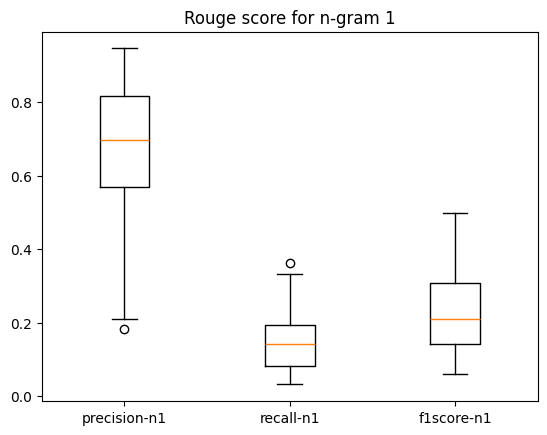

In [4]:
# Plot rogue score to box plot
df = pd.read_csv("test.csv")
average_precision1 = df['precision#1'].mean()
average_recall1 = df['recall#1'].mean()
average_f1score1 = df['f1score#1'].mean()

# print("Average Precision#1: ", average_precision1)
# print("Average Recall#1: ", average_recall1)
# print("Average F1score#1: ", average_f1score1)

fig, ax = plt.subplots()
ax.boxplot([df['precision#1'], df['recall#1'], df['f1score#1']])
ax.set_xticklabels(['precision-n1', 'recall-n1', 'f1score-n1'])
ax.set_title("Rouge score for n-gram 1")
plt.savefig("rouge_score_n1.png")



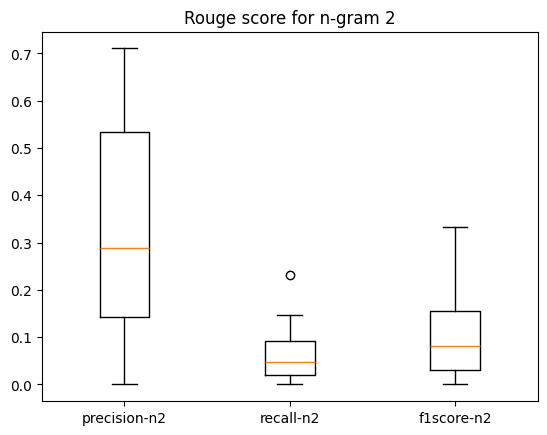

In [5]:
average_precision1 = df['precision#2'].mean()
average_recall1 = df['recall#2'].mean()
average_f1score1 = df['f1score#2'].mean()

fig, ax = plt.subplots()
ax.boxplot([df['precision#2'], df['recall#2'], df['f1score#2']])
ax.set_xticklabels(['precision-n2', 'recall-n2', 'f1score-n2'])
ax.set_title("Rouge score for n-gram 2")
plt.savefig("rouge_score_n2.png")

In [ ]:
# Learn about softmax activation function
z = np.array([1, 2, 3, 4, 5, 7])
print(np.exp(z[0]))
e_z = np.exp(z)
print(e_z)
sum_e_z = np.sum(e_z)
print(sum_e_z)
softmax = e_z / sum_e_z
print(softmax)

In [2]:
import pandas as pd
df1 = pd.read_csv('interview.csv')
df2 = pd.read_csv('questions.csv')

df_combine = pd.concat([df1, df2], ignore_index=True)
df_combine.to_csv('combine.csv', index=False)

# Generating Evaluation

In [6]:
import json
import pandas as pd
with open("manual-transcript.json", 'r') as file:
    json_data = json.load(file)

with open("ev.csv", 'w') as file:
    pd.DataFrame(json_data).to_csv(file)